# Analyse de données

In [331]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [308]:
weather = pd.read_csv('data/weatherHistory.csv')
weather["Formatted Date"] = pd.to_datetime(weather["Formatted Date"],format="%Y-%m-%d %H:%M:%S", utc = True)

#On enlève la column 'Loud Cover' pat manque de données
weather = weather.drop(['Loud Cover'], axis=1)

weather = weather.sort_values(by="Formatted Date")

weather = weather[~(weather["Formatted Date"] < '2006-01-01')]

weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 96452 entries, 2881 to 89732
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   Formatted Date            96452 non-null  datetime64[ns, UTC]
 1   Summary                   96452 non-null  object             
 2   Precip Type               95935 non-null  object             
 3   Temperature (C)           96452 non-null  float64            
 4   Apparent Temperature (C)  96452 non-null  float64            
 5   Humidity                  96452 non-null  float64            
 6   Wind Speed (km/h)         96452 non-null  float64            
 7   Wind Bearing (degrees)    96452 non-null  float64            
 8   Visibility (km)           96452 non-null  float64            
 9   Pressure (millibars)      96452 non-null  float64            
 10  Daily Summary             96452 non-null  object             
dtypes: datetime6

In [268]:
weather.isnull().sum()

Formatted Date                0
Summary                       0
Precip Type                 517
Temperature (C)               0
Apparent Temperature (C)      0
Humidity                      0
Wind Speed (km/h)             0
Wind Bearing (degrees)        0
Visibility (km)               0
Pressure (millibars)          0
Daily Summary                 0
dtype: int64

In [267]:
weather.groupby('Precip Type').size()

Precip Type
rain    85223
snow    10712
dtype: int64

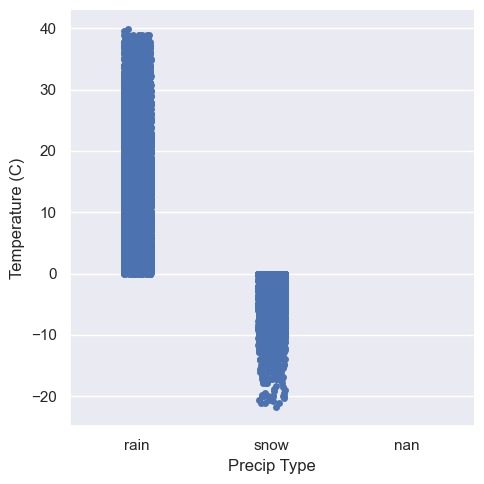

In [274]:
sns.catplot(
            x=weather['Precip Type'],
            y=weather['Temperature (C)']
        )

<AxesSubplot: xlabel='Precip Type', ylabel='Temperature (C)'>

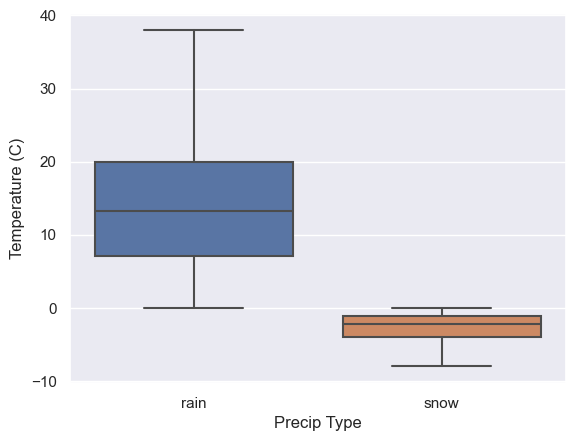

In [322]:
box = weather[(weather['Temperature (C)'] > -8) & (weather['Temperature (C)'] < 38)]
sns.boxplot(
            x=box['Precip Type'],
            y=box['Temperature (C)']
        )

Graphique categoriel des predictions en foction de l'humidité

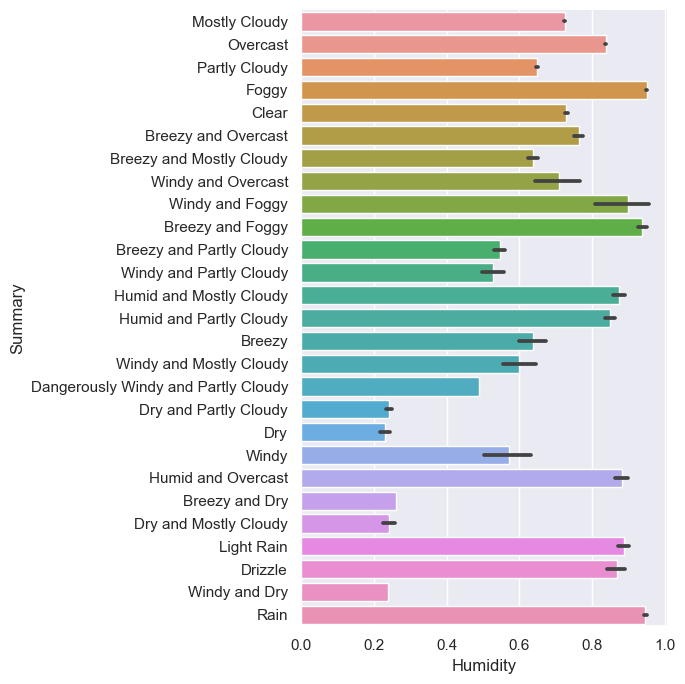

In [312]:
sns.catplot(
            data = weather,
            x="Humidity",
            y="Summary",
            kind="bar",
            height = 7
        )

Histogramme des predictions en foction de la temperature

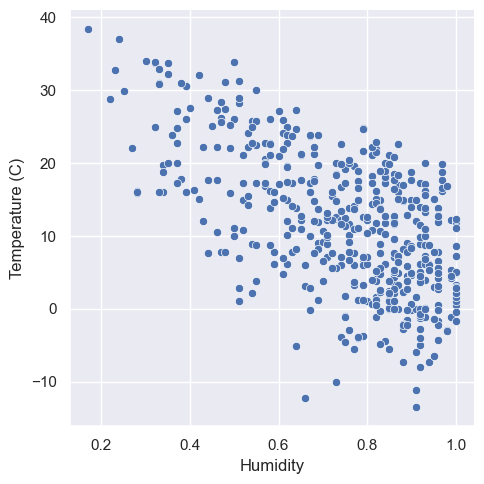

In [340]:
sns.relplot(
            data =weather.sample(500),
            x='Humidity',
            y='Temperature (C)'
)
#Correlation de -0.6

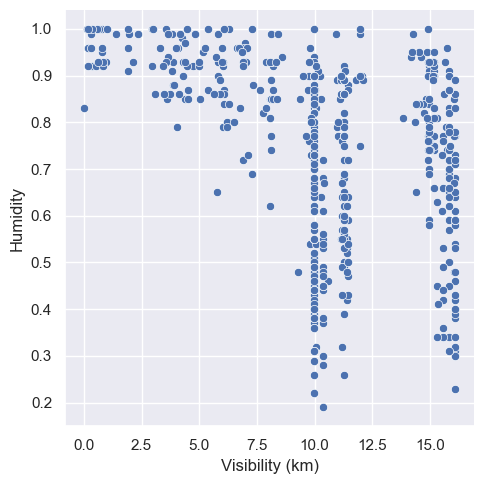

In [333]:
sns.relplot(
            data =weather.sample(500),
            x='Visibility (km)',
            y='Humidity'
)

Le changement de la temperature moyenne en par an

In [ ]:
weather.insert(1, "Day", pd.DatetimeIndex(weather["Formatted Date"]).day)
weather.insert(2, "Month", pd.DatetimeIndex(weather["Formatted Date"]).month)
weather.insert(3, "Year", pd.DatetimeIndex(weather["Formatted Date"]).year)

weather['Month'] = pd.to_datetime(weather['Month'], format='%m').dt.month_name().str.slice(stop=3)

In [316]:
tempPerDay = weather.groupby(['Year','Month','Day'],sort=False)["Temperature (C)"].mean()
tempPerMonth = tempPerDay.groupby(level=['Year','Month'],sort=False).mean()
tempPerYear = tempPerMonth.unstack(level='Month')

Text(0.5, 1.0, 'Average temperature over the years')

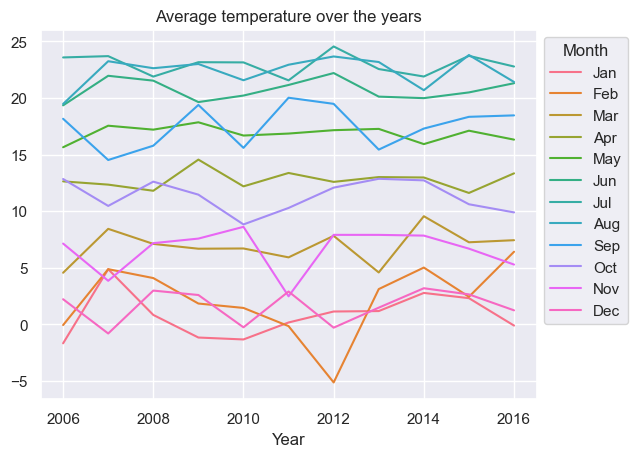

In [248]:
sns.set_theme(style="darkgrid")
ax = sns.lineplot(data=tempPerYear, dashes=False)
sns.move_legend(ax, "upper left", bbox_to_anchor=(1, 1))
plt.title("Average temperature over the years")

<AxesSubplot: xlabel='Year', ylabel='Humidity'>

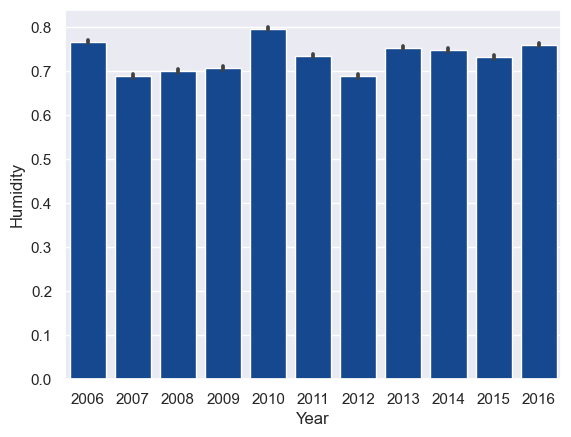

In [335]:
sns.barplot(x=weather['Year'],y=weather['Humidity'],color='#0245A3')

In [226]:
df = weather.drop(['Formatted Date','Day','Month','Year'], axis=1)

array([[<AxesSubplot: title={'center': 'Temperature (C)'}>,
        <AxesSubplot: title={'center': 'Apparent Temperature (C)'}>,
        <AxesSubplot: title={'center': 'Humidity'}>],
       [<AxesSubplot: title={'center': 'Wind Speed (km/h)'}>,
        <AxesSubplot: title={'center': 'Wind Bearing (degrees)'}>,
        <AxesSubplot: title={'center': 'Visibility (km)'}>],
       [<AxesSubplot: title={'center': 'Pressure (millibars)'}>,
        <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

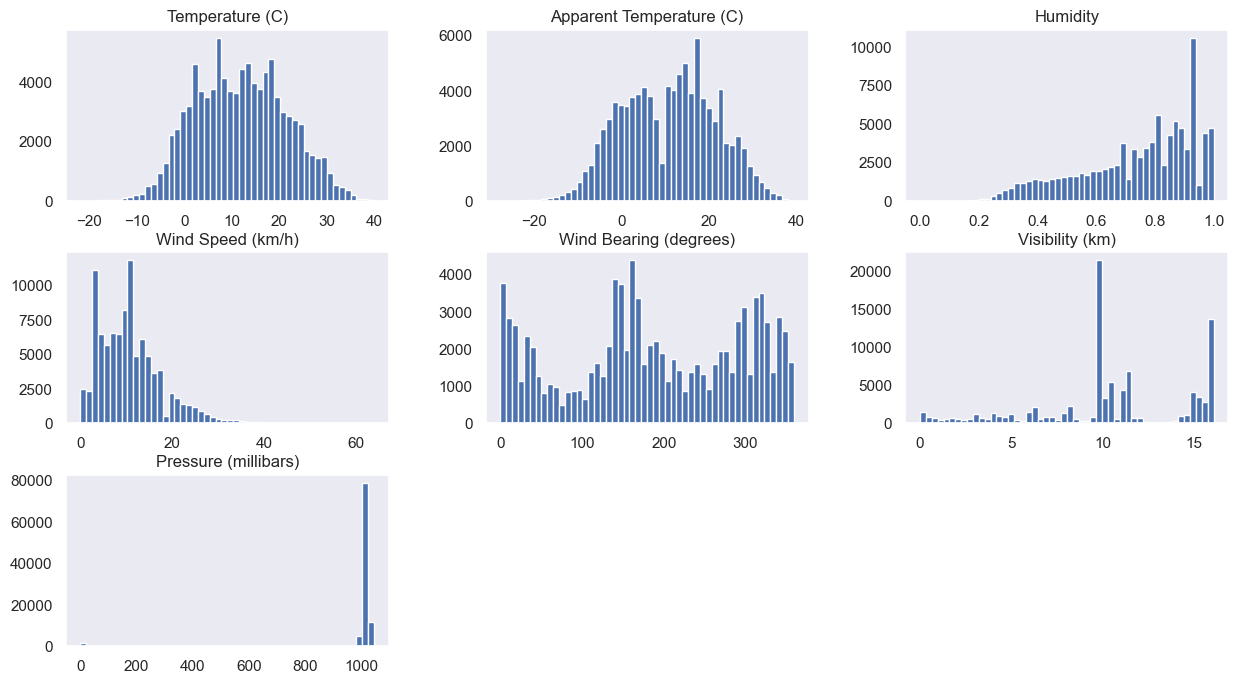

In [262]:
df.hist(
        grid=False,
        legend=False,
        figsize=(15, 8),
        bins=50,
        orientation='vertical'
)

<AxesSubplot: >

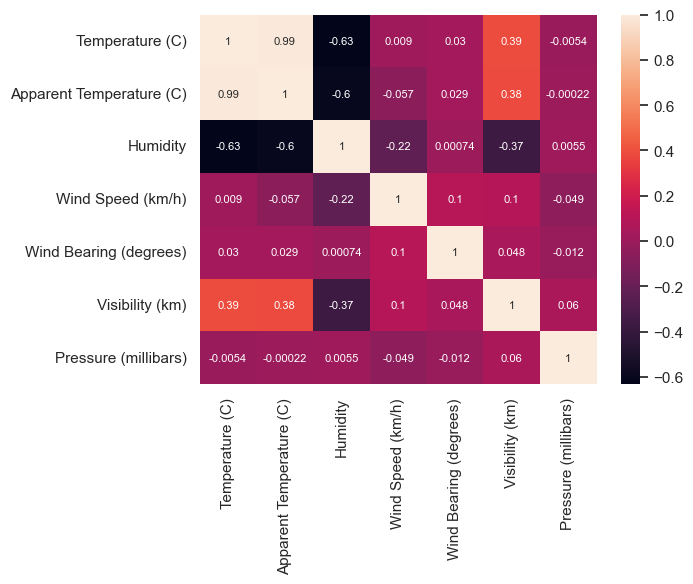

In [253]:
sns.heatmap(df.corr(),annot=True,annot_kws={"size":8})